# Uczenie maszynowe- biblioteka scikit-learn

## etapy trenowania algorytmu uczącego: 
1. dobór cech
2. wybór metryki skuteczności
3. wybór klasyfikatora i algorytmu optymalizacji
4. ocena skuteczności modelu

### Uczenie perceptronu za pomocą biblioteki scikit-learn

In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X= iris.data[:,[2,3]]
y= iris.target
np.unique(y)

array([0, 1, 2])

### Podział danych uczących na testowe i uczące 

In [3]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Standaryzacja cech:

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Perceptron w scikit-learn

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter= 40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

C:\Users\zija\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test_std)
print ('Nieprawidłowo sklasyfikowane próbki: %d' % (y_test != y_pred).sum())

Nieprawidłowo sklasyfikowane próbki: 4


In [8]:
from sklearn.metrics import accuracy_score
print ('Dokładność: %.2f'% accuracy_score(y_test, y_pred))

Dokładność: 0.91


### Wyniki w postaci wykresów:

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #rysuje wykres powierzchni decyzyjnej

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #rysuje wykres wszystkich próbek

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            # rysujemy wyłącznie tylko te punkty, które w danym kroku mają taką wartość y jak zmienna cl czyli 0 1 lub 2
            alpha=0.8,
            c=cmap(idx),
            marker=markers[idx],
            label=cl)
    # zaznacza próbki testowe
    if test_idx:
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn(
                'Zaktualizuj bibliotekę NumPy do wersji 1.9.0 lub nowszej')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c='',
            alpha=1.0,
            linewidth=1,
            marker='o',
            edgecolors='k',
            s=80,
            label='Zestaw testowy')

Trenowanie modelu perceptronu za pomocą standaryzowanych danych uczących:

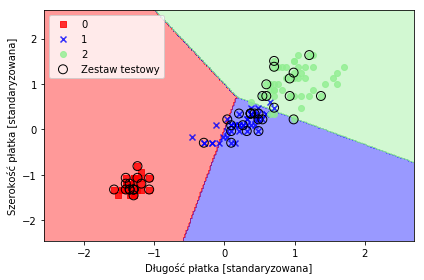

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./rysunki/03_01.png', dpi=300)
plt.show()

## UCzenie modelu regresji logistycznej za pomocą biblioteki scikit-learn 

### teoretyczne podloże regresji logistycznej i prawdopodobieństwa warunkowego:

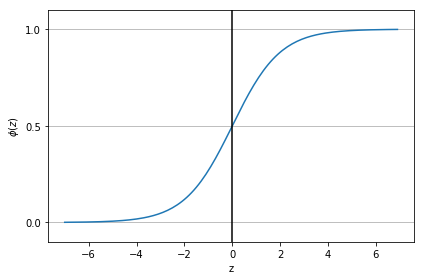

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# jednostki i siatka osi y
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('./rysunki/03_02.png', dpi=300)
plt.show()

### Wyznaczanie wag logistycznej funkcji kosztu:

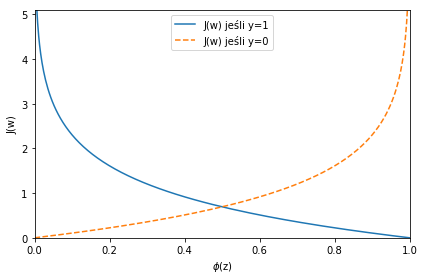

In [12]:
def cost_1(z):
    return -np.log(sigmoid(z))


def cost_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) jeśli y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) jeśli y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('./rysunki/03_04.png', dpi=300)
plt.show()

### Uczenie modelu regresji logistycznej za pomocą biblioteki:

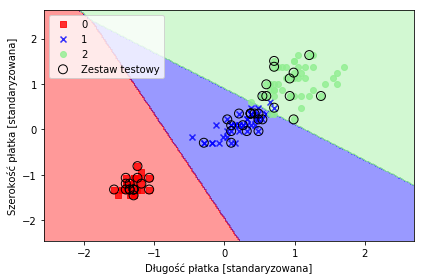

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr, test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./rysunki/03_05.png', dpi=300)
plt.show()

In [14]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

## Zapobieganie nadmiernemu dopasowaniu przez regularyzację

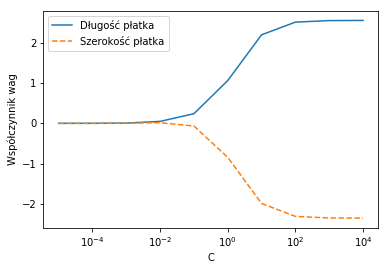

In [15]:
weights, params= [], []
for c in np.arange(-5,5):
    tmp= 10**np.int(c)
    lr= LogisticRegression(C=tmp, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(tmp)
weights= np.array(weights)
plt.plot(params, weights[:, 0],
         label='Długość płatka')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Szerokość płatka')
plt.ylabel('Współczynnik wag')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('./rysunki/03_07.png', dpi=300)
plt.show()


##  Maszyna wektorów nośnych, SVM

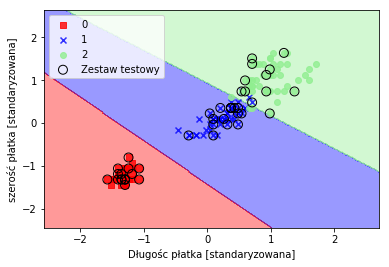

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel ='linear', C= 1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105,150))
plt.xlabel('Długośc płatka [standaryzowana]')
plt.ylabel('szerość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

## Rozwiązywanie nieliniowych problemów za pomocą jądra SVM

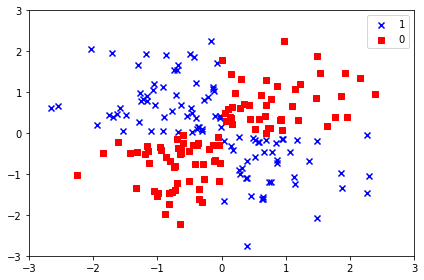

In [17]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor= np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./rysunki/03_11.png', dpi=300)
plt.show()

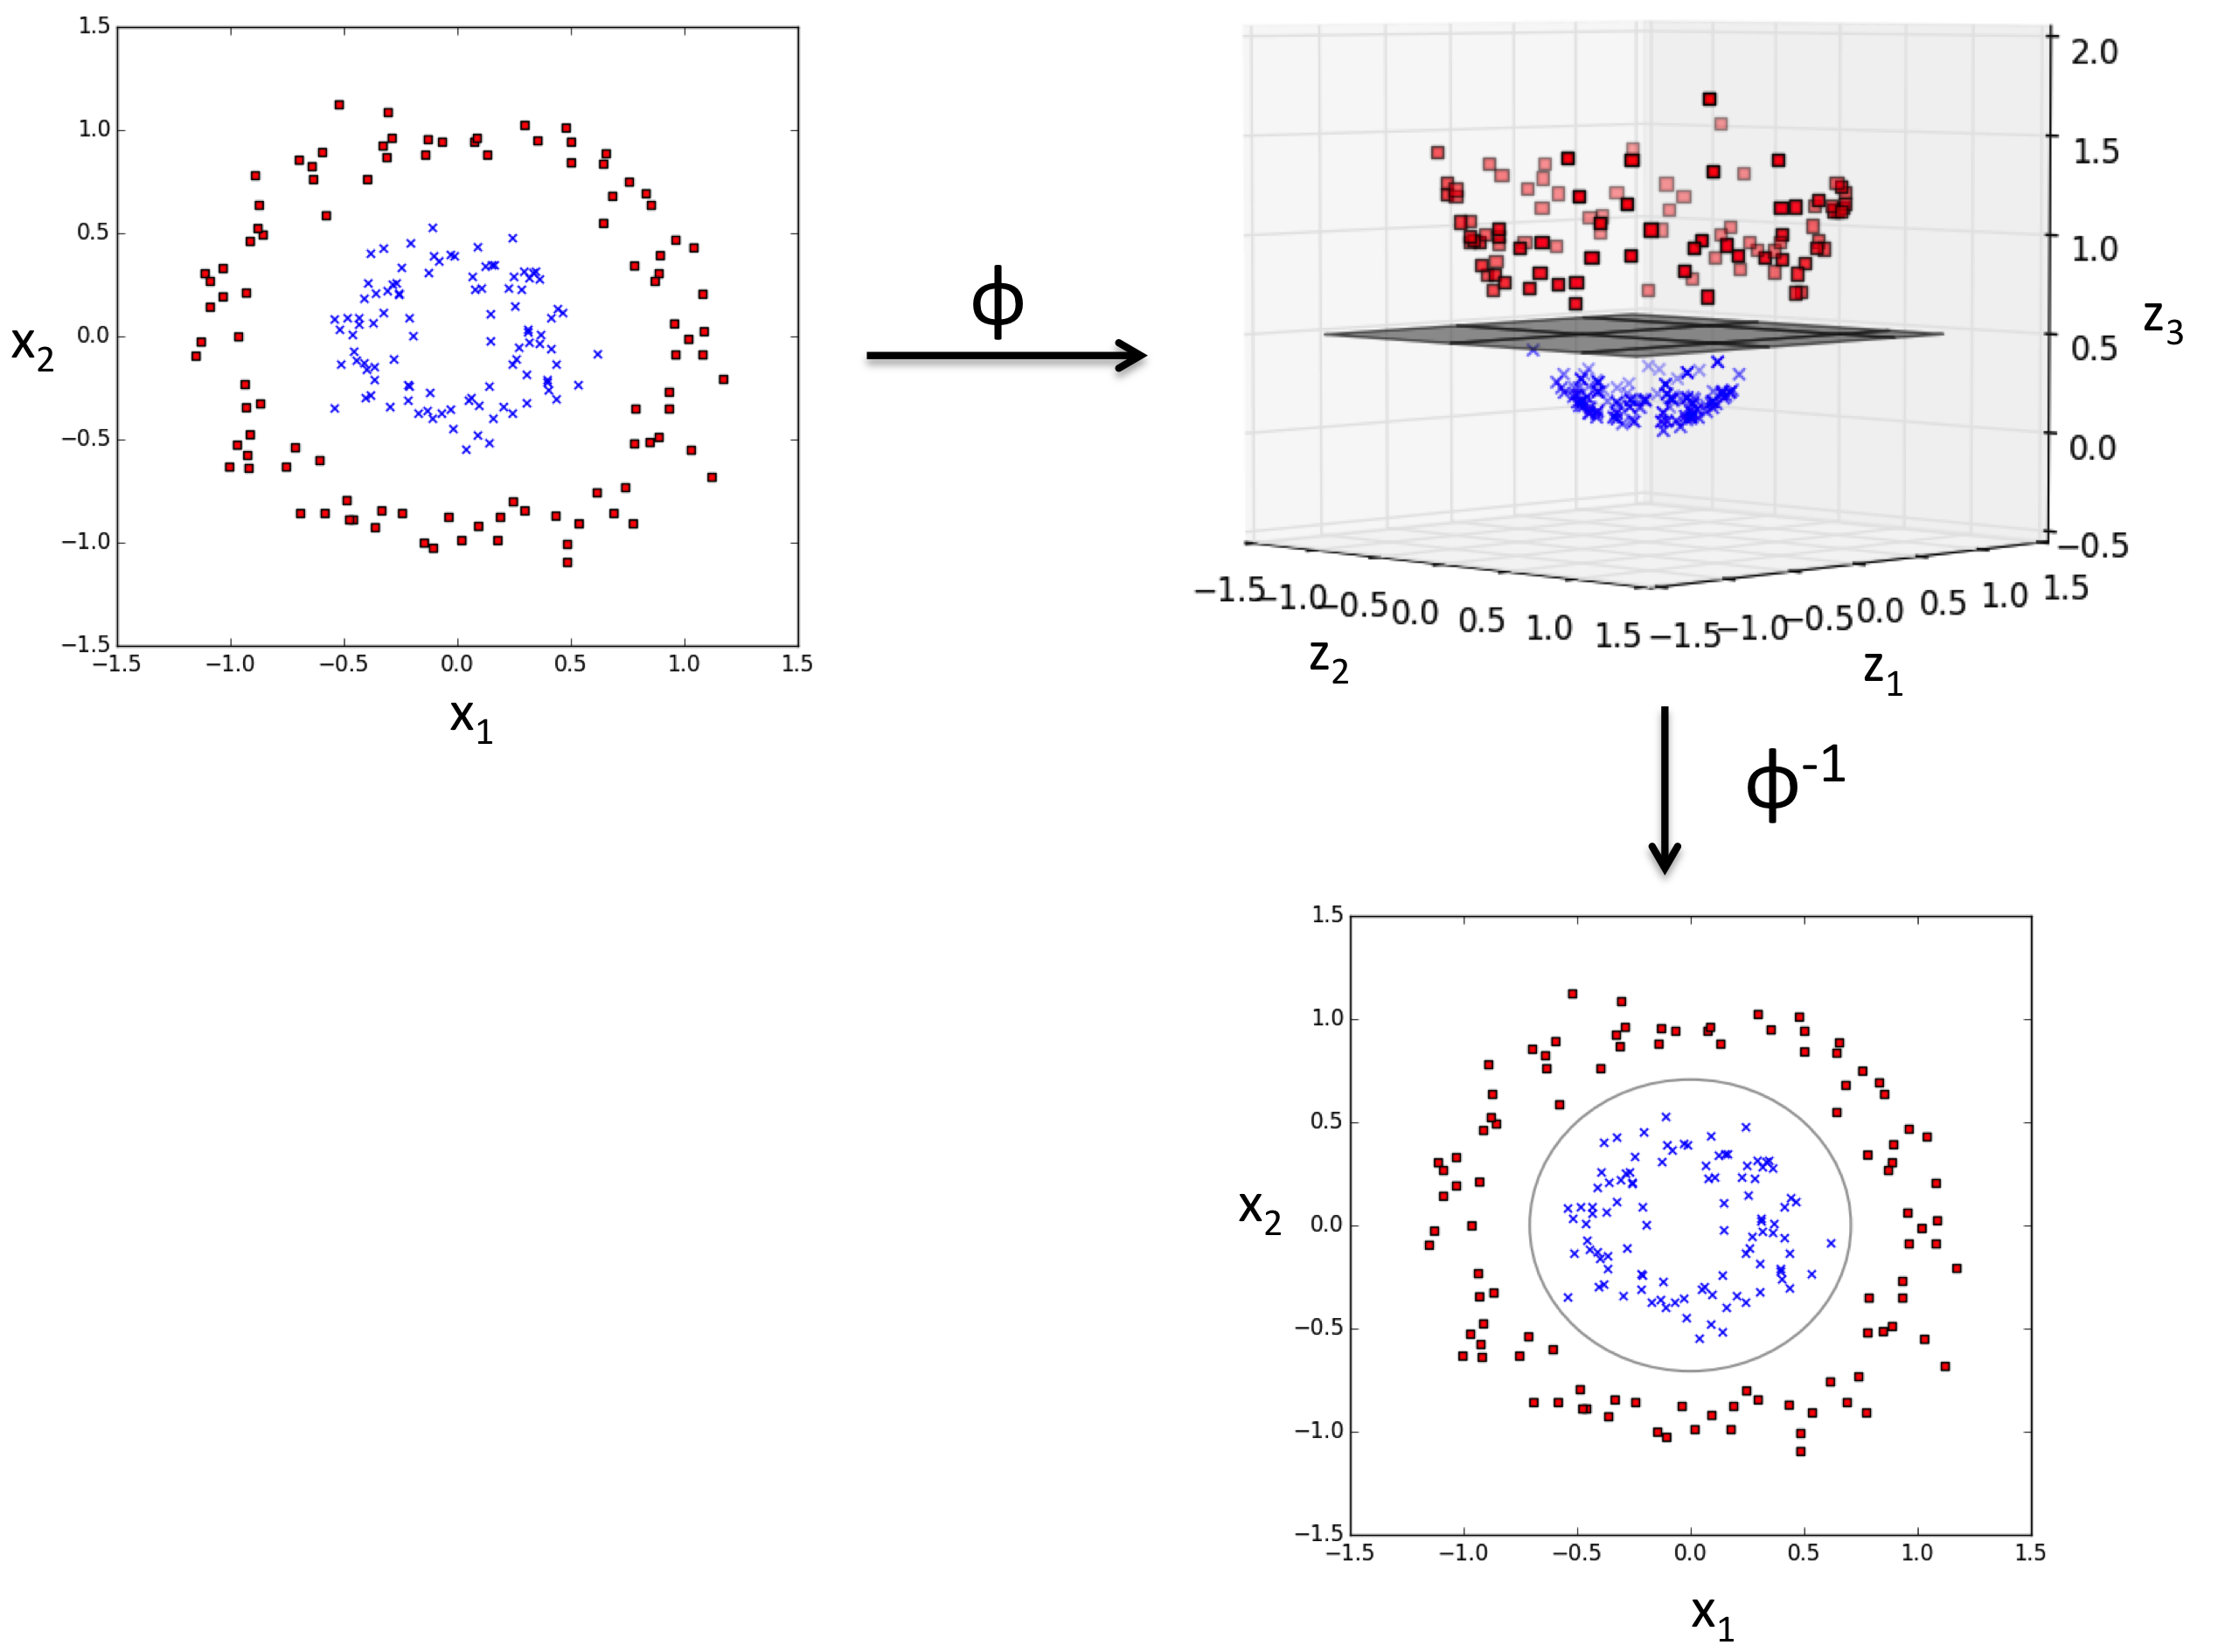

In [18]:
Image(filename='./rysunki/rozdzial 3/03_12.png', width=700) 

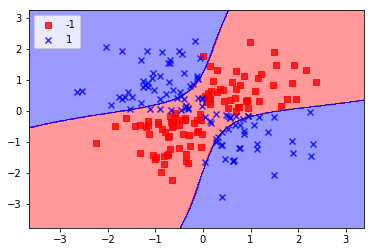

In [19]:
svm= SVC(kernel='rbf',random_state=0, gamma=0.1, C=1.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

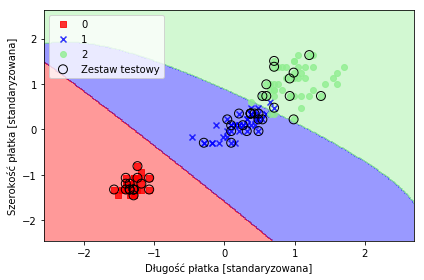

In [20]:

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./rysunki/03_14.png', dpi=300)
plt.show()

Co się stanie gdy zwiększymy wartość parametru gamma?

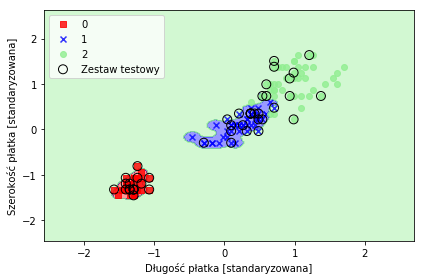

In [21]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105,150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./rysunki/03_14.png', dpi=300)
plt.show()

Próbki są znakomicie dopasowane, ale granice decyzyjne wokół klas 0  i 1 są bardzo ciasne, prawdopodobne duże błędy dla nieznanych danych

## Modele drzew decyzyjnych


#### Cechy:
    -decision tree
    -model jako klasyfikowanie danych poprzez podejmowanie decyzji na podstawie szeregu opowiedzi

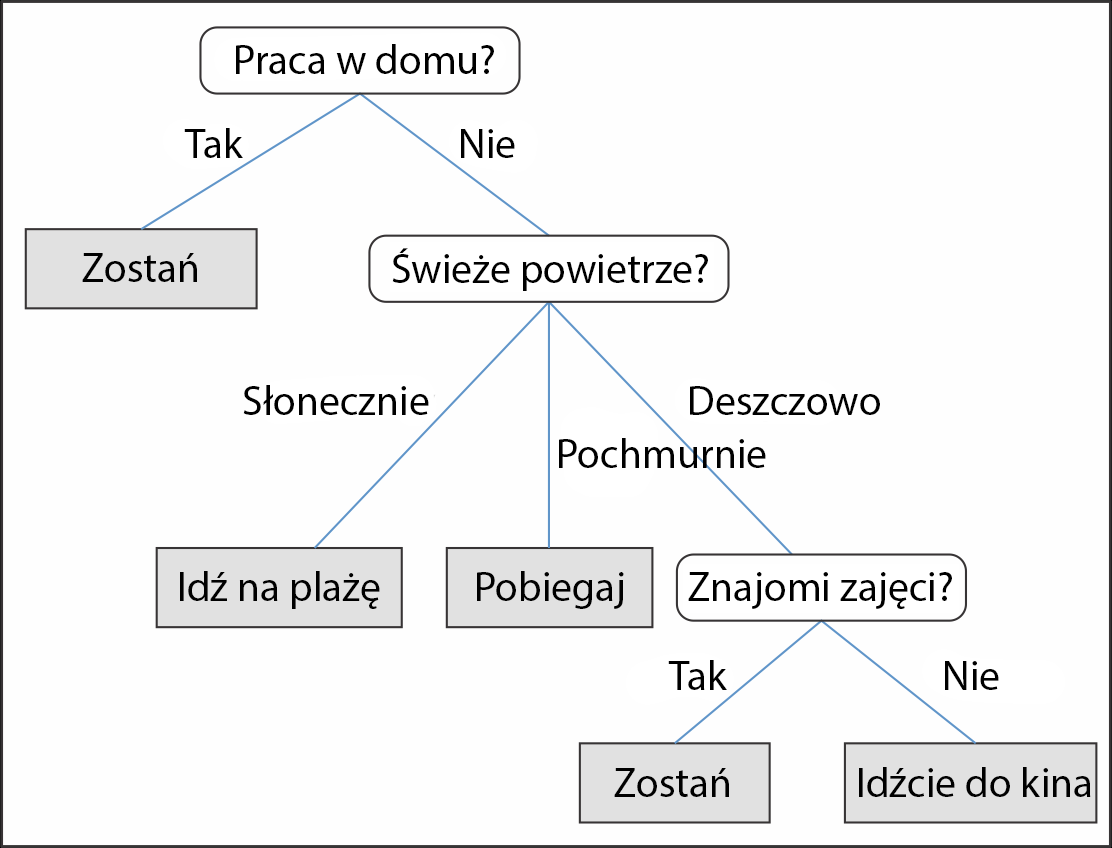

In [22]:
Image(filename='./rysunki/rozdzial 3/03_16.png', width=500) 


Taką listę można zbudować dla zestawu danych jak Iris np. granice dla osi rzędnych (szerokość działki $\geq$ 2.5 cm?)

Za pomocą algorytmu tworzymy korzeń drzewa rozdzielamy wobec cechy o największym przyroście informacji (IG). Wykonujemy wielokrotne iteracje. Trzeba uważać na zbyt duże drzewa, stąd __przycinanie__ do maksymalnej wysokości.
    
Definiowanie funkcji celu:maksymalizacja przyrostu informacji

$$IG(D_p,f)= I(D_p) - \sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$$

gdzie:
1. f to cecha  na podstawie której zostanie przeprowadzone rozgałęzienie
2. $D_p$ $D_j$ to zestawy danych nadrzędnego węzła  i j-tego potomnego
3. $N_p$ $N_j$ to całkowita liczba próbek węzła nadrzędnego  i j-tego potomnego
4. I stanowi miarę zanieczyszczenia

Czyli jest to różnica między zanieczyszczeniem węzła potomnego a sumą zanieczyszczeń węzłów potomnych

W praktyce w scikit learn mamy drzewa binarne

$$IG(D_p, f)= I(D_p) - \frac{N_{lewy}}{N_p}I(D_{lewy}) - \frac{N_{prawy}}{N_p}I(D_{prawy})$$

W binarnych drzewach decyzyjnych 3 najpowszechniej wykorzystywanymi miarami zanieczyszczeń są  wskaźnik Giniego 
(Gini impurity $I_G$), entropia $I_H$ oraz błąd klasyfikacji $I_E$

Entropia: $$I_H(t)= -\sum_{i=1}^c p(i|t)log_2p(i|t)$$

Wyrażenie p(i|t) oto proporcja pomiędzy próbkami należacymi do klasy i w danym węźle t. Entropia będzie wynosić 0, gdy wszystkie 
próbki będą należeć do tej samej klasy, an największa wartość gdy będzie jednorodny rozkład klas. Ot  w binarnym rozkładzie:
    
Entropia wynosi 0 dla p(i=1|t)=1 lub p(i=0,t)=0, a maks p(i=1|t)=0.5 i p(pi=0,t)=0.5

Wskaźnik Giniego, który zachowuje się podobnie jak entropia: $$ I_G(t)=1- \sum_{i=1}^c p(i|t)^2$$

Błąd klasyfikacji: $$I_E(t)=1- max{p(i|t)}$$

podatne na przycinanie, lecz nie zaleca się do rozwijania drzewa z powodu mniejsze czułości na zmiany w rozkładzie prawdopodobieństwa.

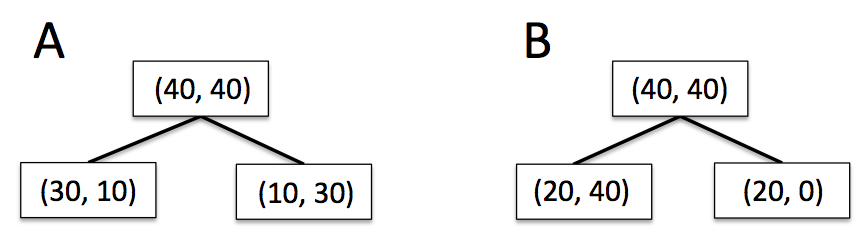

In [23]:
Image(filename='./rysunki/rozdzial 3/03_17.png', width=500)

Przykład z książki strona 99-100. Który wskaźnik zanieczyszczenia daje najlepsze rezultaty, błąd klasyfikacji: przyrost informacji taki sam, mimo 2 różnych przypadków. Wskaźnik Giniego i entropia sprzyjają scenariuszowi B.

## Maksymalizowanie przyrostu informacji - osiąganie jak największych korzyści.

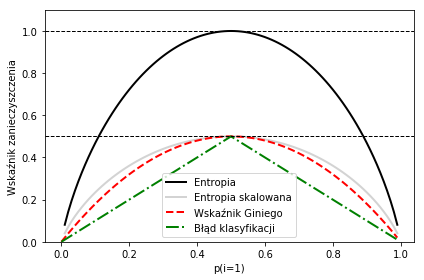

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def gini (p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))

def entropy(p):
    return -(p)*np.log2(p) -(1-p)*np.log2(1-p)

def error(p):
    return  1- np.max([p,1-p])

x=np.arange(0.0,1,0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
er=[error(i) for i in x]
fig= plt.figure()
ax=plt.subplot(1,1,1)
for i, lab, ls, c in zip([ent,sc_ent, gini(x),er],
                        ['Entropia', 'Entropia skalowana','Wskaźnik Giniego', 'Błąd klasyfikacji'],
                        ['-','-','--','-.'],
                        ['black','lightgray','red','green']):
    line=ax.plot(x,i,label=lab,linestyle=ls, lw=2, color=c)

ax.legend(loc='best')

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Wskaźnik zanieczyszczenia')
plt.tight_layout()
#plt.savefig('./rysunki/03_18.png', dpi=300, bbox_inches='tight')
plt.show()


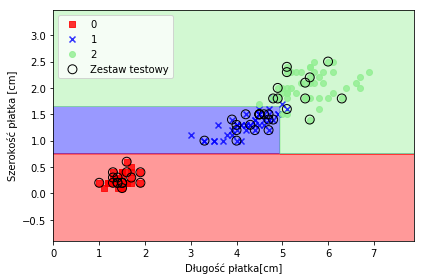

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('Długość płatka[cm]')
plt.ylabel('Szerokość płatka [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./rysunki/03_19.png', dpi=300)
plt.show()

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='drzewo.dot',feature_names=['długość płatka','szerokość płatka'])

## Łączenie niewydajnych klasyfikatorów w klasyfikatory wydajne za pomocą modelu losowego lasu

Zespół drzew decyzyjnych
1. Wprowadzanie losowania n próbek początkowych (bootstrap, losowo dobierz n próbek z zestawu uczącego i wstaw za nie próbki zastępcze
2. wygeneruj drzewo decyzyjne  na podstawie próbek początkowych, w każdym węźle:
<br>
-dobierz losowo d cech i nie zastępuj ich innymi
<br>
-rozdziel węzeł za pomocą cechy gwarantującej najlepsze rozgałęzienie pod kątem funkcji celu
3. powtórz kroki 2 i 3 k-krotnie
4. Zbierz prognozy otrzymane z każdego drzewa i przydzielaj próbkom etykiety klas poprzez <strong>większościowe głosowanie </strong>.
<br>
Co dobieramy: k, n czyli rozmiar próbek początkowych oraz d czyli liczba losowo dobieranych cech.
<br>
Za pomocą n kontrolujemy kompromis między obciążeniem  a wariancją, im większe n tym mniejsza losowość, nadmierne dopasowanie możliwe, mniejsze n zmniejszone ryzyko przetrenowania. 
<br>
d dobieramy tak, by była to wartość mniejsza od całkowitej liczby cech z zbiorze danych uczących  $d=\sqrt{m}$

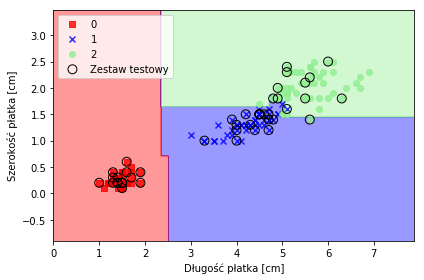

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('Długość płatka [cm]')
plt.ylabel('Szerokość płatka [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./rysunki/03_21.png', dpi=300)
plt.show()

## Algorytm k-najbliższych sąsiadów- model leniwego uczenia

1. KNN- k-nearest neighbor classifier, lazy learner
2. nie uczy się funkcji dyskryminacyjnej na podstawie danych uczących , lecz stara się "zapamiętać" cały zbiór próbek
<br>
<br>
Modele parametryczne: oszacowujemy parametry zestawu uczącego, trenujemy funkcję, która sklasyfikuje nowe punkty danych bez ponownego korzystania z danych uczących. Np. perceptron, regresja logistyczna, SVN.
<br>
M. nieparamtrycznych nie da się opisać za pomocą ustalonego zestawu uczącego, a ich liczba wzrasta wraz z danymi uczącymi, np. losowy las, algorytm jądra SVN
<br>
KNN nalęzy do nieparametrycznych zwanych uczeniem z przykładów (instance-based learning), zapamiętują całe dane uczące, koszt uczenia zero dla KNN.
<br>
Algorytm:
1. Wybierz jakąś wartość parametru k i metrykę odległości 
2. Znajdź k-najbliższych sąsiadów próbki
3. Przydziel etykięte klasy poprzez najbliższe głosowanie większościowe.


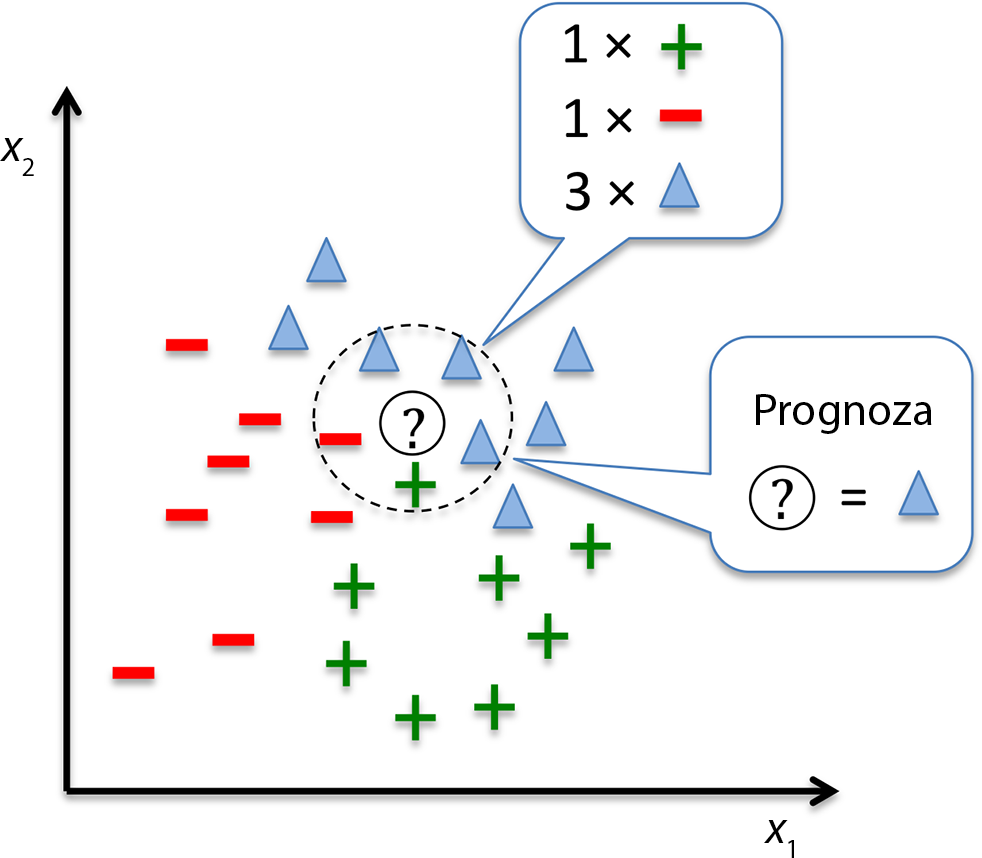

In [33]:
Image(filename='./rysunki/rozdzial 3/03_22.png', width=400) 

1. Największa zaleta: natychmiastowe adaptowanie się klasyfikatora w trakcie pobierania nowych danych.
2. Główna wada: liniowy wzrost złożoności obliczeniowej wraz z liczbą próbek uczących. 
3. nie możemy odrzucać żadnych danych, nie ma procesu uczenia
4. Metryki: np euklidesowa przy p równym 2: 



$d(x^{(i)},x^{(j)})= \sqrt[p]{\sum_k{|x_k^{(i)}-x_k^{(j)}|}^p}$

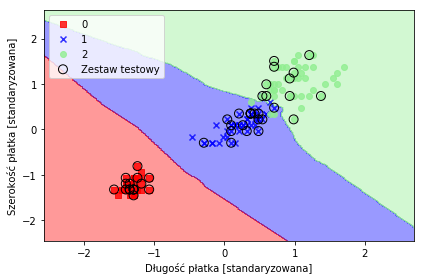

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(
    X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('./rysunki/03_23.png', dpi=300)
plt.show()